# Task 1: Amino acid sequence analysis

# 1
obtain FASTA files of protein sequences of the following 7 species from NCBI Genome Database.
Arabidopsis thaliana
Human
Mouse
Zebrafish
Chlamydomonas (green alga)
Cyanidioschizone (red alga)
Budding yeast

In [9]:
def is_protein_sequence(sequence):
    # Define valid amino acid characters
    valid_amino_acids = set('ARNDCQEGHILKMFPSTWYV')
    
    # Check each character in the sequence
    for char in sequence:
        if char not in valid_amino_acids:
            return False
    return True

sequence = "MDLQHGGAFYSTRIRAAESYEDTAHSAVCIITAGVRQRPGESRLELMDRNAALFKGIIPPLVQYSQNTILLVVSNPVDLLTHLAWQMSGLPRERVIGSGTYLDSSRFRTLLAQRLGIDTASVQAMVLGEHGDSSFVYRSGITVGGVPLRTCFERMTDAASASTAFYDLVKGVHQQVVAAAYEVIKLKGYTNWAIGSAVGSIVTTIVHDRRKVLPITTHAGSLRGLESADVFLSLPCVLGRNGVVEVLQILPFMESDEKEDLQSSIEALQSTPKKAS"
if is_protein_sequence(sequence):
    print("The sequence is a valid protein sequence.")
else:
    print("The sequence is not a valid protein sequence.")


The sequence is a valid protein sequence.


## Attemp to parse fasta

In [10]:
def parse_fasta_file(input_file):
    """
    input_file - fasta
    return - {id:gene_seq} dictionary
    """
    f = open(input_file)

    parsed_seqs = {}
    curr_seq_id = None
    curr_seq = []

    for line in f:
        line = line.strip()

        if line.startswith(">"):
            if curr_seq_id is not None: 
                parsed_seqs[curr_seq_id] = ''.join(curr_seq)

            curr_seq_id = line[1:]
            curr_seq = []
            continue

        curr_seq.append(line)

    # Add the final sequence to the dict
    if curr_seq_id is not None:
        parsed_seqs[curr_seq_id] = ''.join(curr_seq)

    f.close()
    print(len(parsed_seqs))
    return parsed_seqs


In [11]:
input_file = 'assignment01_data/Cyanidioschyzon protein.faa'
temp = parse_fasta_file(input_file)
for i, (key, value) in enumerate(temp.items()):
    if is_protein_sequence(value) == True:
        print(f"{key}: {value}")
        print("Length of Protein Sequence: ", len(value))
    else:
        break

4803
XP_005534764.1 L-lactate dehydrogenase [Cyanidioschyzon merolae strain 10D]: MDLQHGGAFYSTRIRAAESYEDTAHSAVCIITAGVRQRPGESRLELMDRNAALFKGIIPPLVQYSQNTILLVVSNPVDLLTHLAWQMSGLPRERVIGSGTYLDSSRFRTLLAQRLGIDTASVQAMVLGEHGDSSFVYRSGITVGGVPLRTCFERMTDAASASTAFYDLVKGVHQQVVAAAYEVIKLKGYTNWAIGSAVGSIVTTIVHDRRKVLPITTHAGSLRGLESADVFLSLPCVLGRNGVVEVLQILPFMESDEKEDLQSSIEALQSTPKKAS
Length of Protein Sequence:  276
XP_005534765.1 similar to cell surface glycoprotein [Cyanidioschyzon merolae strain 10D]: MFRARSLVRGLVVAVCLLLAATFSVSLVAALSPVSTVSWTWIGGETGRDNPGNYGTLNQTSADSVPGGRYDSAAWVGSSSLVYLFGGVGGGNPYLSYFNDLWTFNLTSHEWTWIGGSSEADQPGVYGTVGTGSPANTPGSRYRSAYWQMDEQHFWLFGGLGYDRNANFGPMNDMWMYDTESRVWTWVSGNDTVNAGTIYGAEGVFGPSYNPGSRGSASFWLGADGTFWLFGGENNLGDSVSDLWSFNPTTLQWAYRGGSQLANQPGNYSAPGVANNSSAPGARIVANTWTDFEGNLWMFGGLGYGDSTAPGQGKLNDLWVYNISQSVWIFIAGNTTINNPGSYGSLGAFAPTSYPGARDSGVSFVDSLGNLLLFGGEGYGNTRESPGDLNDLWVFDMTLGQWAWINGSQNGFALSVYGFLNKTSPSVSPGGRTGSVFWNTSGTDPVMFGGFGYSNTSIPGYLNDVFALSETFFTPTPTPTPTSTPTLTPTITPTATATPTPTLTPTPTPTPTATPTPT

# 2
Proteins are composed of a series of amino acids, but their length and composition vary from protein to protein. Proteins vary in length, but by looking at the distribution of the length of proteins encoded by a given genome, we can understand the overall picture (proteome) of the proteins of that species. Compare the distribution of protein lengths of each species using the following visualization method. Consider whether converting the protein lengths to logarithmic values changes the interpretation.
* Density distribution
* Box-and-whisker plot
* Violin plot

In [12]:
import numpy as np
import pandas as pd



## Data preparation

In [13]:
import os

def parse_fasta_folder(input_folder):
    """
    input_folder - folder containing .faa files
    return - DataFrame with 'Species', 'Protein ID', 'Protein Length'
    """
    parsed_seqs = {}

    # Iterate through all files in the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith('.faa'):
            species_name = filename[:-4]  # Assuming species name is the filename without extension
            file_path = os.path.join(input_folder, filename)
            
            with open(file_path) as f:
                curr_seq_id = None
                curr_seq = []

                for line in f:
                    line = line.strip()

                    if line.startswith(">"):
                        if curr_seq_id is not None:
                            parsed_seqs[curr_seq_id] = (species_name, ''.join(curr_seq))

                        curr_seq_id = line[1:]
                        curr_seq = []
                        continue

                    curr_seq.append(line)

                # Add the final sequence to the dict
                if curr_seq_id is not None:
                    parsed_seqs[curr_seq_id] = (species_name, ''.join(curr_seq))

    print(f"Total sequences parsed: {len(parsed_seqs)}")
    return parsed_seqs


In [14]:
def convert_to_dataframe(parsed_seqs):
    """
    Convert the parsed sequences dictionary to a DataFrame.
    """
    data = []
    for seq_id, (species, seq) in parsed_seqs.items():
        data.append({'Protein ID': seq_id, 'Species': species, 'Protein Length': len(seq)})
    
    return pd.DataFrame(data)

## Visualize

In [15]:
# Specify the folder containing the .faa files
input_folder = 'assignment01_data'

# Parse the folder containing .faa files
parsed_data = parse_fasta_folder(input_folder)
# print(parsed_data)

# Convert to DataFrame
df = convert_to_dataframe(parsed_data)

# Display the DataFrame
df.head()

Total sequences parsed: 365746


,Protein ID,Species,Protein Length
0,NP_001018029.1 Coq21p [Saccharomyces cerevisia...,Saccharomyces cerevisiae protein,66
1,NP_001018030.1 L-serine/L-threonine ammonia-ly...,Saccharomyces cerevisiae protein,360
2,NP_001018031.2 Adf1p [Saccharomyces cerevisiae...,Saccharomyces cerevisiae protein,113
3,NP_001018032.1 uncharacterized protein YCR095W...,Saccharomyces cerevisiae protein,52
4,NP_001018033.3 uncharacterized protein YGR161W...,Saccharomyces cerevisiae protein,92


/var/folders/7_/m771rz_51sv6wk1xxw05dzf40000gn/T/ipykernel_4702/314694824.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Species')


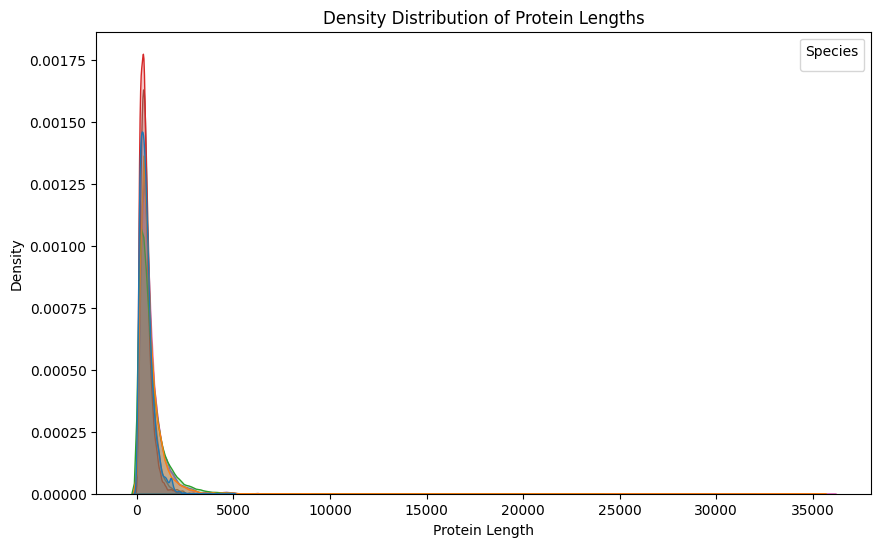

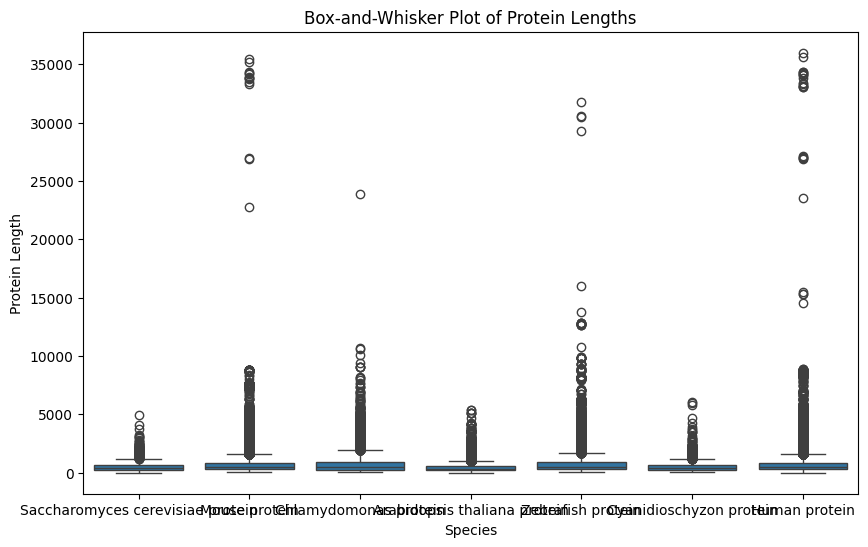

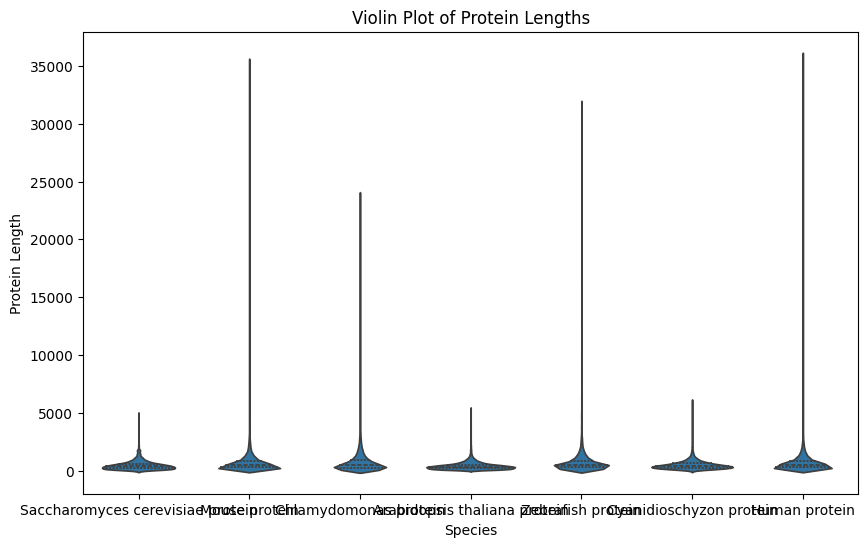

In [16]:
# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# Density Distribution Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Protein Length', hue='Species', fill=True, common_norm=False)
plt.title('Density Distribution of Protein Lengths')
plt.xlabel('Protein Length')
plt.ylabel('Density')
plt.legend(title='Species')
plt.show()

# Box-and-Whisker Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Species', y='Protein Length')
plt.title('Box-and-Whisker Plot of Protein Lengths')
plt.xlabel('Species')
plt.ylabel('Protein Length')
plt.show()

# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Species', y='Protein Length', inner='quartile')
plt.title('Violin Plot of Protein Lengths')
plt.xlabel('Species')
plt.ylabel('Protein Length')
plt.show()


### Logarithmic Value

/var/folders/7_/m771rz_51sv6wk1xxw05dzf40000gn/T/ipykernel_4702/1068332703.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Species')


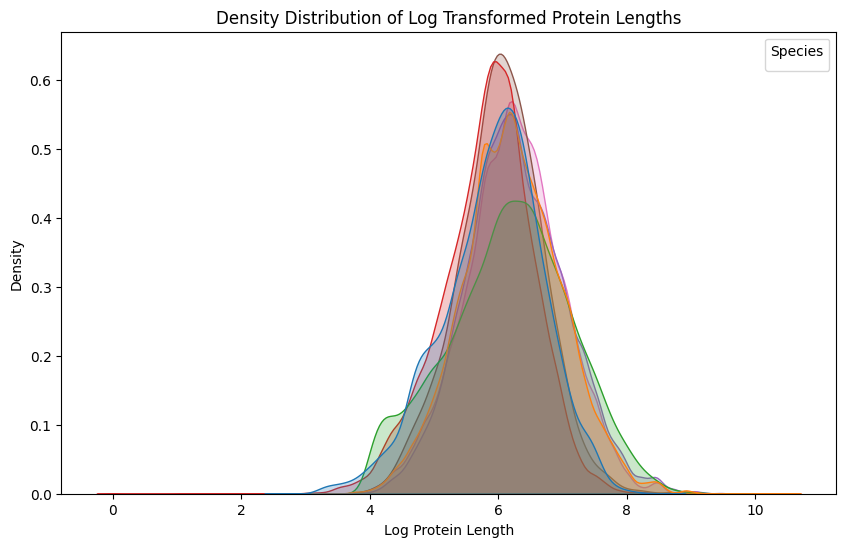

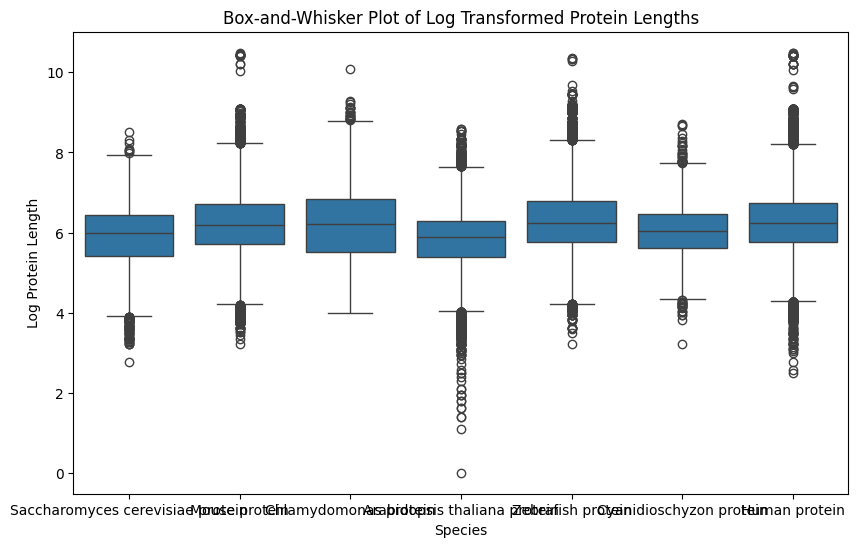

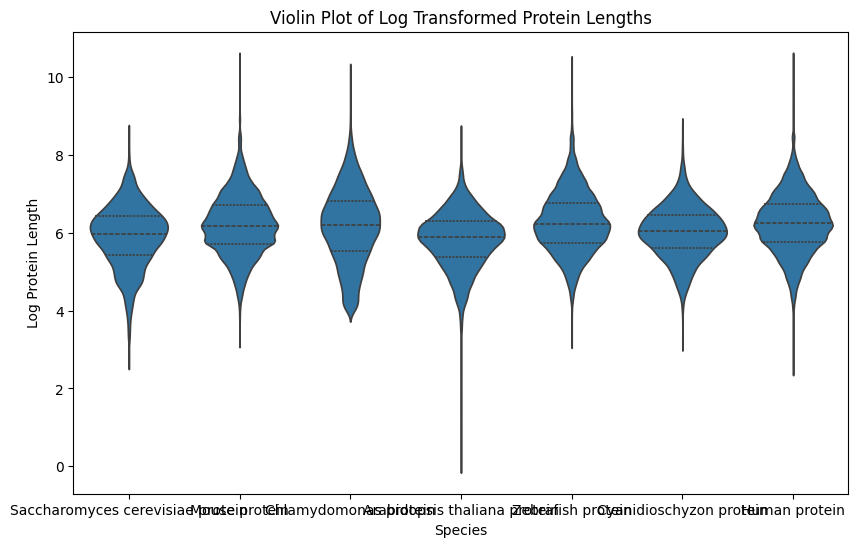

In [17]:

# Apply logarithmic transformation and visualize again if needed
df['Log Protein Length'] = np.log(df['Protein Length'])

# Density Distribution on Log Scale
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Log Protein Length', hue='Species', fill=True, common_norm=False)
plt.title('Density Distribution of Log Transformed Protein Lengths')
plt.xlabel('Log Protein Length')
plt.ylabel('Density')
plt.legend(title='Species')
plt.show()

# Box-and-Whisker Plot on Log Scale
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Species', y='Log Protein Length')
plt.title('Box-and-Whisker Plot of Log Transformed Protein Lengths')
plt.xlabel('Species')
plt.ylabel('Log Protein Length')
plt.show()

# Violin Plot on Log Scale
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Species', y='Log Protein Length', inner='quartile')
plt.title('Violin Plot of Log Transformed Protein Lengths')
plt.xlabel('Species')
plt.ylabel('Log Protein Length')
plt.show()

### Make the plots easier to read

/var/folders/7_/m771rz_51sv6wk1xxw05dzf40000gn/T/ipykernel_4702/3775919700.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Species', fontsize=12)


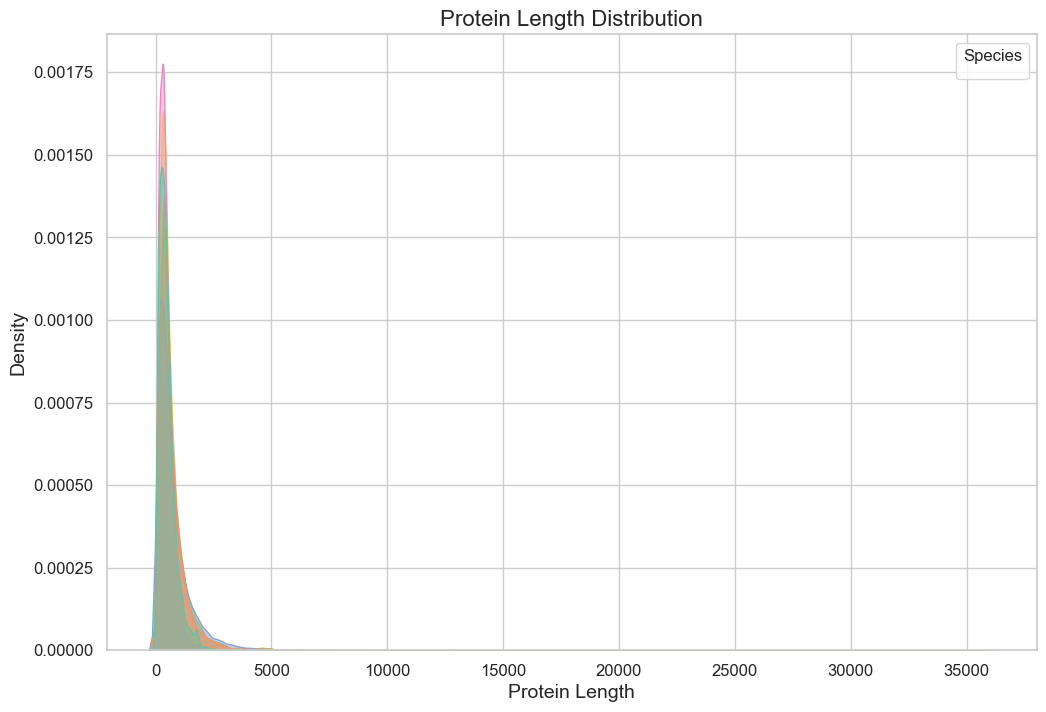

/var/folders/7_/m771rz_51sv6wk1xxw05dzf40000gn/T/ipykernel_4702/3775919700.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Species', fontsize=12)


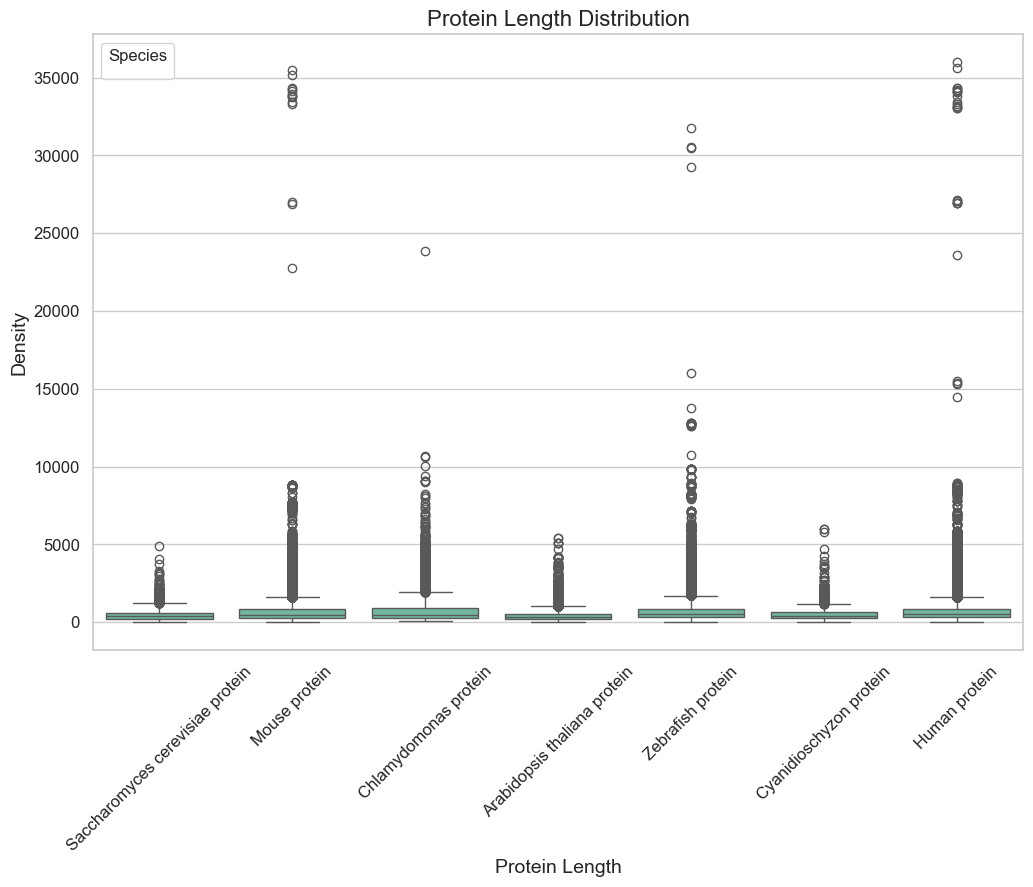

/var/folders/7_/m771rz_51sv6wk1xxw05dzf40000gn/T/ipykernel_4702/3775919700.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Species', fontsize=12)


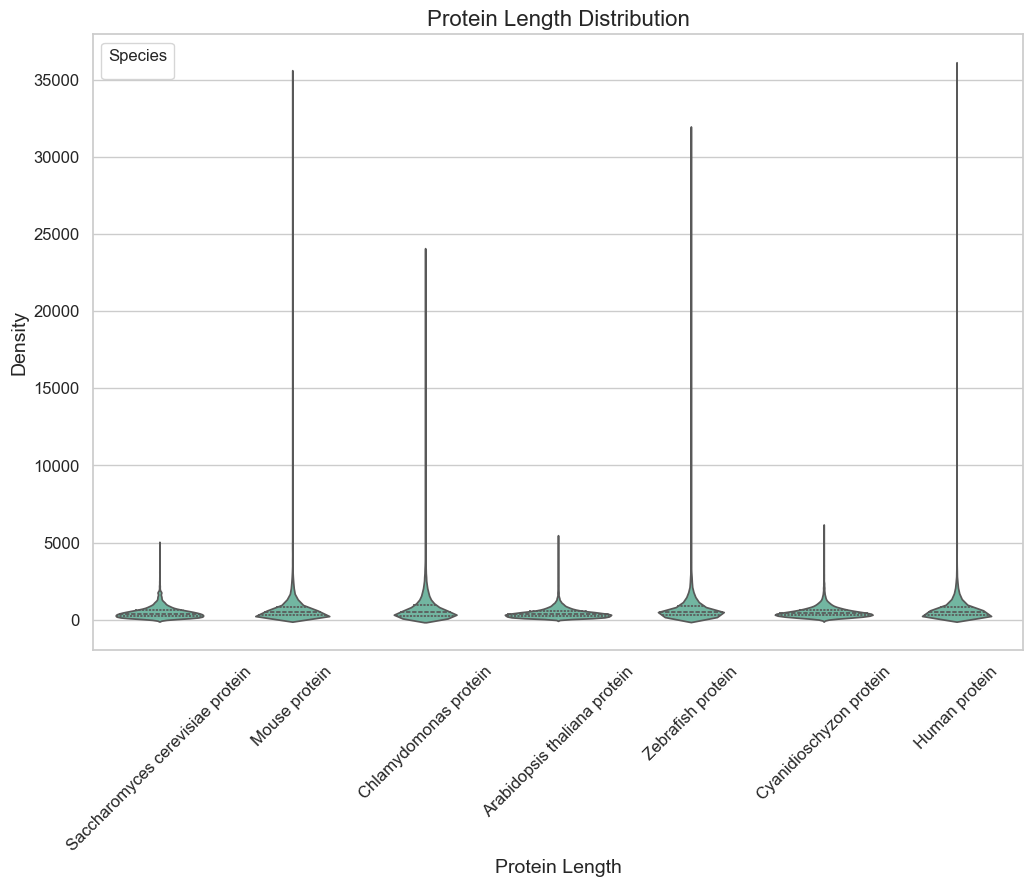

/var/folders/7_/m771rz_51sv6wk1xxw05dzf40000gn/T/ipykernel_4702/3775919700.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Species', fontsize=12)


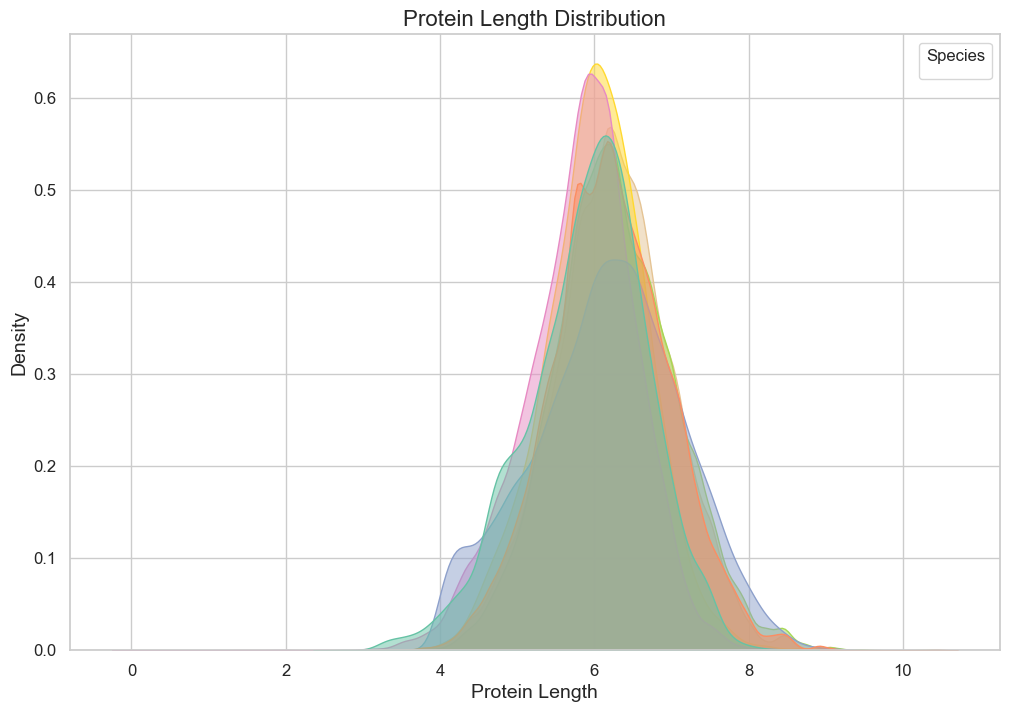

/var/folders/7_/m771rz_51sv6wk1xxw05dzf40000gn/T/ipykernel_4702/3775919700.py:53: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Species', fontsize=12)


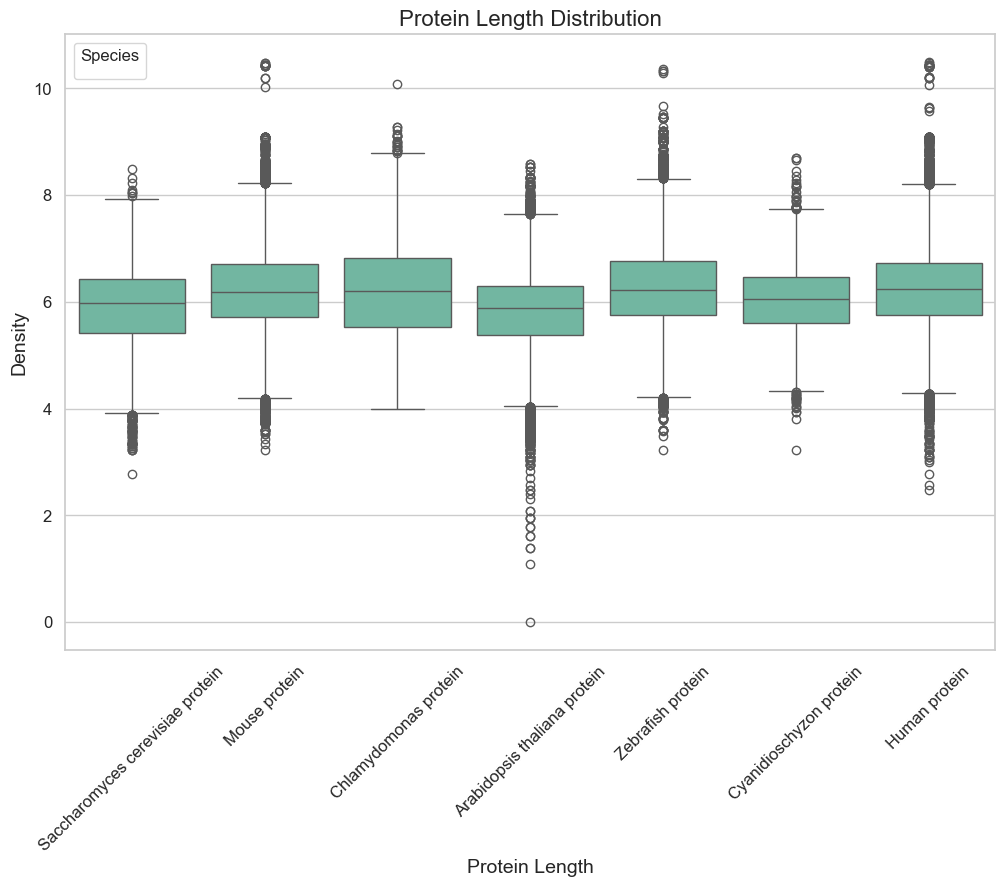

/var/folders/7_/m771rz_51sv6wk1xxw05dzf40000gn/T/ipykernel_4702/3775919700.py:61: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Species', fontsize=12)


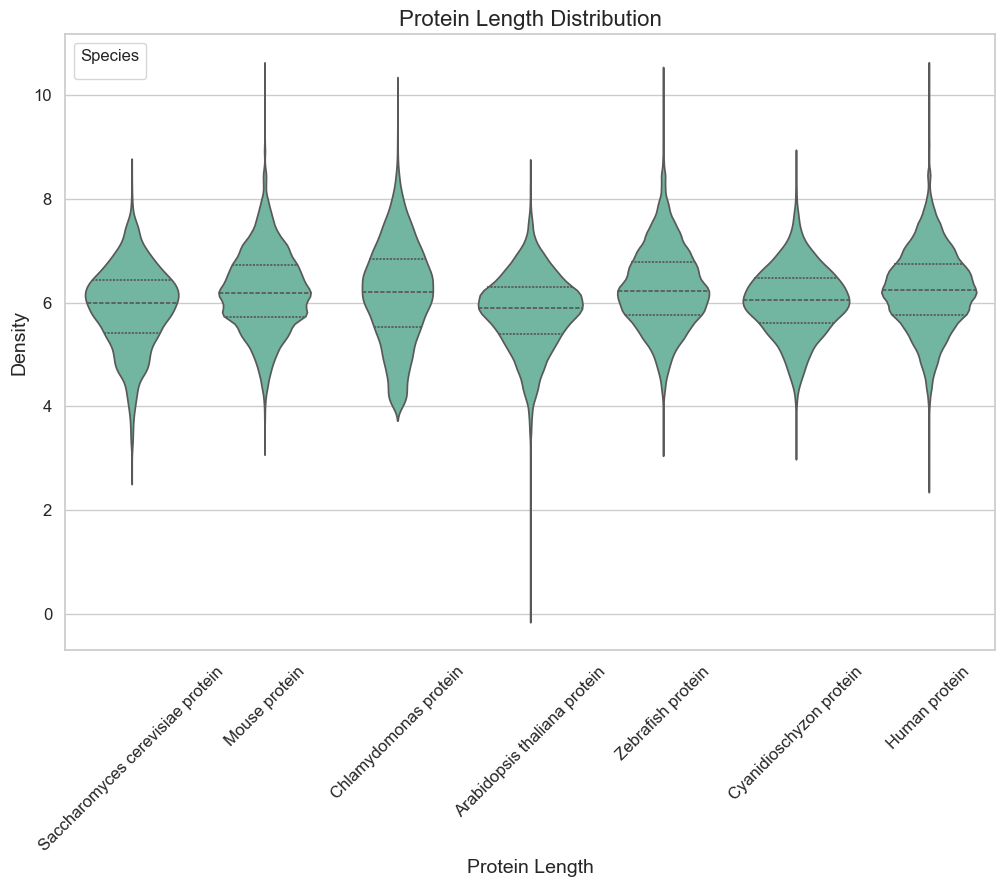

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style and palette
sns.set(style='whitegrid', palette='Set2')

# Adjusting the plot aesthetics
def pretty_plot():
    plt.title('Protein Length Distribution', fontsize=16)
    plt.xlabel('Protein Length', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

# Density Distribution Plot
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x='Protein Length', hue='Species', fill=True, alpha=0.5, common_norm=False)
pretty_plot()
plt.legend(title='Species', fontsize=12)
plt.show()

# Box-and-Whisker Plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Species', y='Protein Length')
pretty_plot()
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Species', fontsize=12)
plt.show()

# Violin Plot
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='Species', y='Protein Length', inner='quartile')
pretty_plot()
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Species', fontsize=12)
plt.show()

# Logarithmic transformation and visualizations
df['Log Protein Length'] = np.log(df['Protein Length'])

# Density Distribution on Log Scale
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x='Log Protein Length', hue='Species', fill=True, alpha=0.5, common_norm=False)
pretty_plot()
plt.legend(title='Species', fontsize=12)
plt.show()

# Box-and-Whisker Plot on Log Scale
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Species', y='Log Protein Length')
pretty_plot()
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Species', fontsize=12)
plt.show()

# Violin Plot on Log Scale
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='Species', y='Log Protein Length', inner='quartile')
pretty_plot()
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Species', fontsize=12)
plt.show()


# 3 Amino acid composision

Modify the parsing code

In [19]:
import os
import pandas as pd
from collections import Counter

def parse_fasta_folder(input_folder):
    """
    Parses .faa files from the input folder and returns a DataFrame with sequences and their lengths.
    """
    parsed_seqs = {}

    for filename in os.listdir(input_folder):
        if filename.endswith('.faa'):
            species_name = filename[:-4]  # Assuming species name is the filename without extension
            file_path = os.path.join(input_folder, filename)
            
            with open(file_path) as f:
                curr_seq_id = None
                curr_seq = []

                for line in f:
                    line = line.strip()

                    if line.startswith(">"):
                        if curr_seq_id is not None:
                            parsed_seqs[curr_seq_id] = (species_name, ''.join(curr_seq))

                        curr_seq_id = line[1:]
                        curr_seq = []
                        continue

                    curr_seq.append(line)

                if curr_seq_id is not None:
                    parsed_seqs[curr_seq_id] = (species_name, ''.join(curr_seq))

    print(f"Total sequences parsed: {len(parsed_seqs)}")
    
    # Convert to DataFrame
    data = []
    for seq_id, (species, seq) in parsed_seqs.items():
        data.append({'Protein ID': seq_id, 'Species': species, 'Protein Sequence': seq})
    
    return pd.DataFrame(data)

# Specify the folder containing the .faa files
input_folder = 'assignment01_data'  # Replace with your folder path
df = parse_fasta_folder(input_folder)


Total sequences parsed: 365746


In [20]:
def calculate_amino_acid_composition(df):
    amino_acids = 'ACDEFGHIKLMNPQRSTVWY'  # The 20 amino acids
    compositions = {aa: [] for aa in amino_acids}

    for seq in df['Protein Sequence']:
        total_length = len(seq)
        counts = Counter(seq)
        
        for aa in amino_acids:
            compositions[aa].append(counts[aa] / total_length if total_length > 0 else 0)

    return pd.DataFrame(compositions)

# Calculate protein lengths
df['Protein Length'] = df['Protein Sequence'].apply(len)

# Calculate amino acid compositions
composition_df = calculate_amino_acid_composition(df)
composition_df['Protein Length'] = df['Protein Length']
composition_df['Species'] = df['Species']


In [21]:
composition_df.head()

,A,C,D,E,F,G,H,I,K,L,...,P,Q,R,S,T,V,W,Y,Protein Length,Species
0,0.166667,0.030303,0.015152,0.060606,0.015152,0.015152,0.000000,0.000000,0.060606,0.060606,...,0.000000,0.045455,0.121212,0.106061,0.030303,0.090909,0.045455,0.045455,66,Saccharomyces cerevisiae protein
1,0.075000,0.022222,0.047222,0.044444,0.041667,0.077778,0.016667,0.097222,0.080556,0.063889,...,0.038889,0.041667,0.033333,0.075000,0.055556,0.080556,0.005556,0.027778,360,Saccharomyces cerevisiae protein
2,0.044248,0.008850,0.026549,0.106195,0.008850,0.053097,0.000000,0.053097,0.194690,0.079646,...,0.017699,0.053097,0.053097,0.097345,0.079646,0.053097,0.000000,0.000000,113,Saccharomyces cerevisiae protein
3,0.019231,0.019231,0.000000,0.019231,0.115385,0.038462,0.057692,0.076923,0.173077,0.115385,...,0.000000,0.000000,0.057692,0.076923,0.038462,0.076923,0.000000,0.057692,52,Saccharomyces cerevisiae protein
4,0.076087,0.010870,0.054348,0.054348,0.065217,0.086957,0.032609,0.043478,0.032609,0.108696,...,0.021739,0.076087,0.021739,0.130435,0.065217,0.010870,0.010870,0.010870,92,Saccharomyces cerevisiae protein


## Visualize

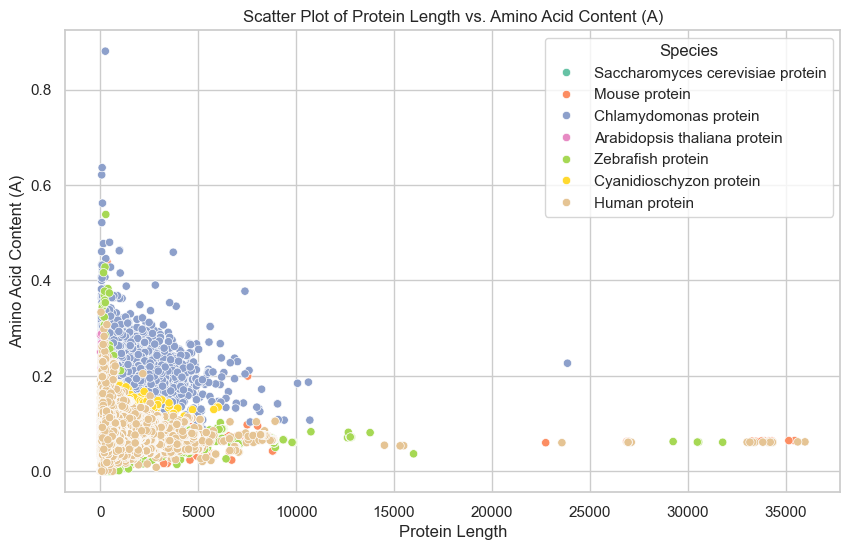

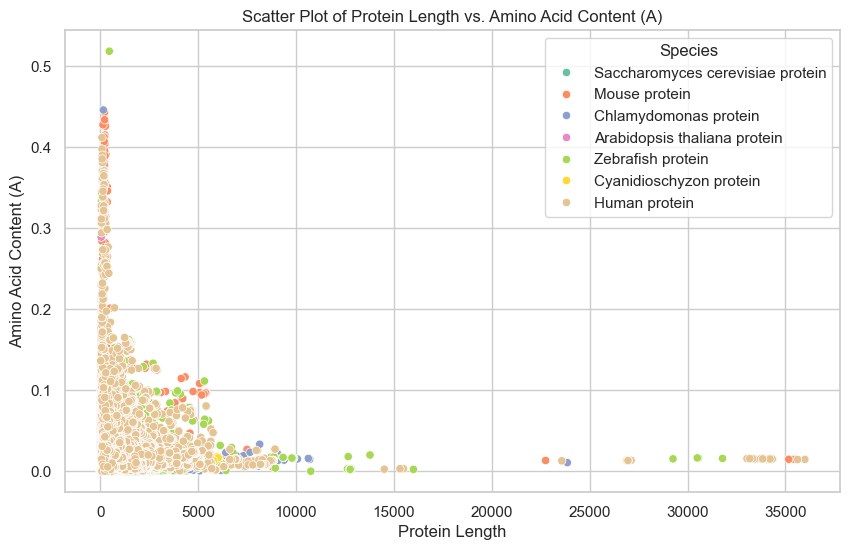

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example for amino acid 'A'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=composition_df, x='Protein Length', y='A', hue='Species')
plt.title('Scatter Plot of Protein Length vs. Amino Acid Content (A)')
plt.xlabel('Protein Length')
plt.ylabel('Amino Acid Content (A)')
plt.show()

# Example for amino acid 'A'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=composition_df, x='Protein Length', y='C', hue='Species')
plt.title('Scatter Plot of Protein Length vs. Amino Acid Content (A)')
plt.xlabel('Protein Length')
plt.ylabel('Amino Acid Content (A)')
plt.show()


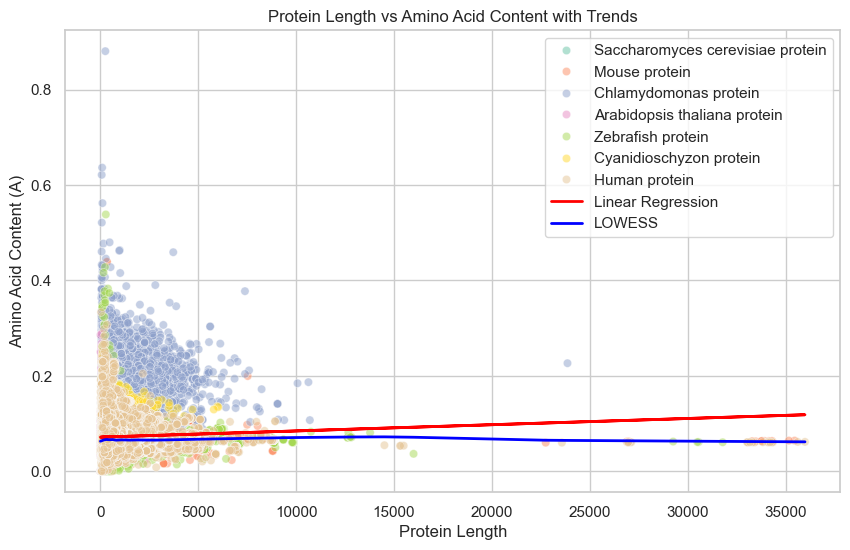

In [28]:
import statsmodels.api as sm

# Linear regression
x = composition_df['Protein Length']
y = composition_df['A']

X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# LOWESS
lowess = sm.nonparametric.lowess(y, x, frac=0.3)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=composition_df, x='Protein Length', y='A', hue='Species', alpha=0.5)
plt.plot(x, predictions, color='red', label='Linear Regression', lw=2)
plt.plot(lowess[:, 0], lowess[:, 1], color='blue', label='LOWESS', lw=2)
plt.title('Protein Length vs Amino Acid Content with Trends')
plt.xlabel('Protein Length')
plt.ylabel('Amino Acid Content (A)')
plt.legend()
plt.show()
